In [7]:
import tensorflow as tf

In [8]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [9]:
from os import listdir
from os.path import isfile, join

In [10]:
!wget http://techno.varee.ac.th/colab/mosquito.zip
!unzip --qq mosquito.zip

--2021-05-28 13:30:30--  http://techno.varee.ac.th/colab/mosquito.zip
Resolving techno.varee.ac.th (techno.varee.ac.th)... 110.164.57.36
Connecting to techno.varee.ac.th (techno.varee.ac.th)|110.164.57.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28715057 (27M) [application/zip]
Saving to: ‘mosquito.zip’

mosquito.zip        100%[===================>]  27.38M  1.06MB/s    in 33s     

2021-05-28 13:31:03 (863 KB/s) - ‘mosquito.zip’ saved [28715057/28715057]



In [11]:
width = 128
num_classes = 2
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [12]:
testImg

['test/Culex', 'test/Aedes']

In [13]:
# One-Hot Encoding
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          #print(file)
          c+=1
          l = imagePath.split('/')[1]
          if l == 'Aedes':
            labels.append([1,0])         
          elif l == 'Culex':
            labels.append([0,1])
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rawImgs.append(img)
  return rawImgs, labels

In [14]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 30/30 [00:00<00:00, 800.15it/s]


In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [16]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))

In [17]:
#Create Nueral Network 
model = keras.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 16)        2064      
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [19]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'])
batch_size = 32
epochs = 10

/Users/kwin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [20]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/10
38/38 [==============================] - 34s 851ms/step - loss: 0.6028 - accuracy: 0.6575 - val_loss: 0.5264 - val_accuracy: 0.7667
Epoch 2/10
38/38 [==============================] - 35s 912ms/step - loss: 0.4455 - accuracy: 0.8267 - val_loss: 0.4220 - val_accuracy: 0.8667
Epoch 3/10
38/38 [==============================] - 65s 2s/step - loss: 0.3382 - accuracy: 0.8667 - val_loss: 0.4831 - val_accuracy: 0.7833
Epoch 4/10
38/38 [==============================] - 69s 2s/step - loss: 0.2771 - accuracy: 0.8883 - val_loss: 0.2662 - val_accuracy: 0.8833
Epoch 5/10
38/38 [==============================] - 72s 2s/step - loss: 0.2237 - accuracy: 0.9217 - val_loss: 0.2154 - val_accuracy: 0.9667
Epoch 6/10
38/38 [==============================] - 67s 2s/step - loss: 0.1817 - accuracy: 0.9367 - val_loss: 0.2688 - val_accuracy: 0.8667
Epoch 7/10
38/38 [==============================] - 63s 2s/step - loss: 0.1411 - accuracy: 0.9600 - val_loss: 0.1963 - val_accuracy: 0.9333
Epoch 8/10
38/

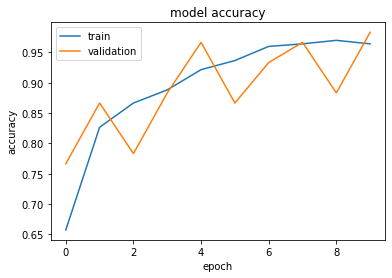

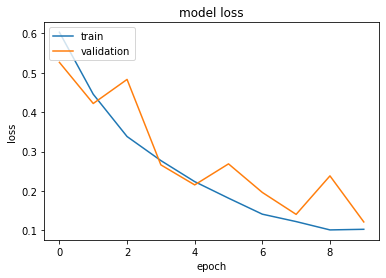

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          #cv2.putText(img, 'real:'+str(item), (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,))
          #cv2.putText(img, 'predict'+str(result), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,0))
          plt.imshow(ori)
          plt.show()

NotADirectoryError: [Errno 20] Not a directory: 'test/.DS_Store'